## Sentiment Analysis of Google Assistant After Google I/O 2018

During Google I/O 2018, Google Duplex, which may be the world’s most lifelike computer, was introduced to the public. Togethor with Google Assistant, it can make human-like coversations with confirmation phrases and human voice patterns. This fascinating report showed the capacity of AI to communicate with humans like humans, which bringing both thrills and worries. Therefore, I made a sentiment analysis of Google Assistment on Twitter to see how people reacted to this news.

### A. Scrape twitter

In [ ]:
#scraped all tweets containing "Google Assistant" from 05/03/18 to 05/13/18 to analyze 
#longitudinal change
#%run ./lib/scrape.py -o ./data/ga.tsv -q "Google Assistant" -s '2018-05-03' -e '2018-05-13'
#%run ./lib/scrape.py -o ./data/ga1.tsv -q "Google Assistant" -s '2018-05-08' -e '2018-05-12'

In [17]:
%matplotlib inline  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from copy import deepcopy
%run ./lib/sentiment.py
tst = TweetsSentiment()
%run ./lib/topic.py
ttp = TweetsTopic()

In [2]:
ga = tst.parse_scraped('./data/ga.tsv', '2018-05-02', '2018-05-14', 'google assistant')
#number of tweets to be analyzed
ga.shape[0]

26325

In [3]:
ga.head()

,Time,ID,Name,Location,Retweet_time,Tweet
465,2018-05-13 23:59:34,3.962200e+08,bhupendra,new delhi,0.0,now gps is old technology upcoming technology ...
466,2018-05-13 23:58:58,2.734140e+07,Liam,"London, England",0.0,google assistant in android p can make reserva...
467,2018-05-13 23:58:42,1.576637e+07,Matty🍕,"Philadelphia, PA",1.0,google assistant phone call cheetahs chase fam...
470,2018-05-13 23:53:40,2.860731e+08,Deep Shukla,"Mississauga, Ontario",0.0,man hey google tell my wife that i cant make i...
473,2018-05-13 23:53:12,9.000950e+17,SMB Daily Info,NaN,0.0,i asked siri alexa and google assistant if the...


### B. Sentiment Analysis

In [4]:
#examples of tweets and corresponding sentiment score (>0 positive; =0 neutral; <0 negative)
for t, s in zip(ga.iloc[:5]['Tweet'], ga.iloc[:5]['Tweet'].apply(tst.get_tweet_sentiment)):
    print '\"%s\" score: %.1f' % (t, s)

"now gps is old technology upcoming technology vps and google assistant launch by sundar pichai" score: 0.1
"google assistant in android p can make reservations for you how" score: 0.0
"google assistant phone call cheetahs chase family childish gambino the bs on the internet via" score: -0.2
"man hey google tell my wife that i cant make it for the dinner along with her parents google assistant okay w" score: 0.5
"i asked siri alexa and google assistant if they re spying on me here s what they said" score: 0.0


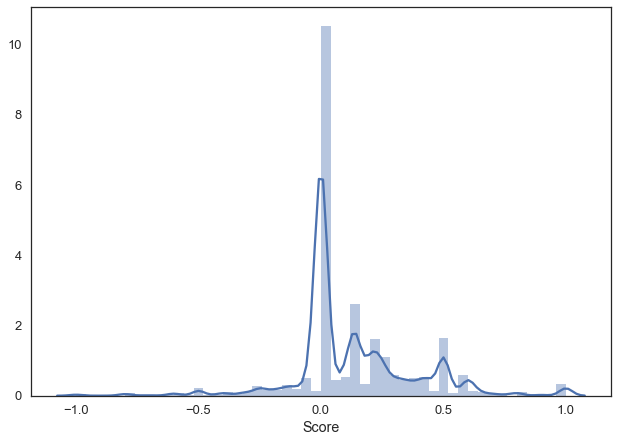

In [4]:
ga['Score'] = ga['Tweet'].apply(tst.get_tweet_sentiment)
plt.figure()
sns.set();sns.set_context({"figure.figsize": (20,20)})
sns.set_context('talk');sns.set_style('white')
sns.distplot(ga['Score'])

#### Fig 1. Distribution of sentiment scores of all tweets. 

Most of the tweets holding a neutral attitude towards Google Assistant. The distribution is skewed to the positive side, meaning that there are more happy tweets about Google assisant than those showing hatred. 

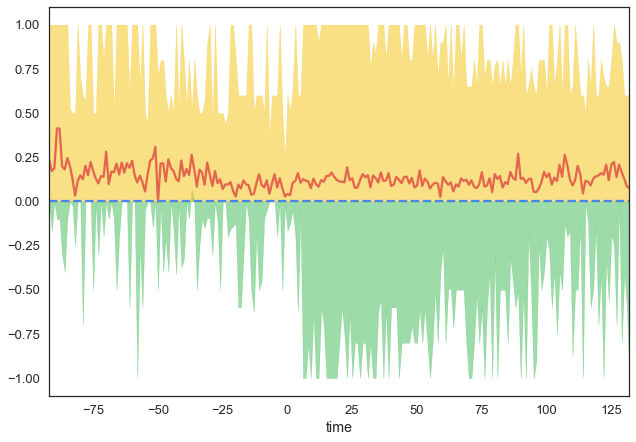

In [30]:
tst.ave_longi_sentiment(ga, '2018-05-08 11:00:00', time_scale='h')

#### Fig 2. Average sentiment score over time.

Red line is the mean sentiment score over time. Yellow area is the range form neutral to maximum positive score and green is the range from neutral to minimum negative score. 0 point on x axis is the time of anouncement, May 8, 2018, 11:00am. In average, people's attitude to Google assistant did not change much after the anouncement. But, both fans and haters expressed their ideas more rigorously after anouncement.

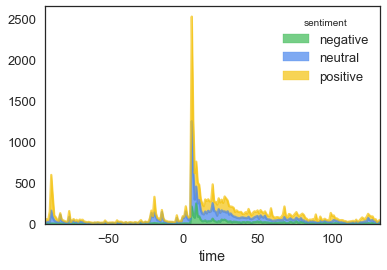

In [20]:
ga_count = tst.proportion_longi_sentiment(ga, '2018-05-08 11:00:00', time_scale='h', thr=0)

#### Fig 3. Proportion of different sentiments to Google Assistant changed over time.

Google Assistant became a hot topic right after the anouncement and most people were happy with new features and the joint with Duplex. This heat retained until 5 days later and people were continuously passionate about Google Assistant.

In [21]:
#total number of tweets every hour
total_count = ga_count.sum(axis=1)
ga_count['total'] = total_count
ga_count = ga_count.sort_values(by='total', ascending=False)
ga_count.head()
#peak showed up 6 hours later

sentiment,negative,neutral,positive,total
time,,,,
6.0,209.0,1043.0,1275.0,2527.0
7.0,98.0,536.0,628.0,1262.0
9.0,247.0,205.0,305.0,757.0
8.0,71.0,222.0,324.0,617.0
-88.0,1.0,158.0,436.0,595.0


In [23]:
max(total_count) / ga_count.loc[0]['total'] 
#number of tweets at peak is 27 times of those before

27.467391304347824

In [28]:
#proportion of different sentiments at each time
ga_proportion = ga_count[['negative', 'neutral', 'positive']].div(ga_count.total, axis=0)
ga_proportion.head()

sentiment,negative,neutral,positive
time,,,
6.0,0.082707,0.412742,0.504551
7.0,0.077655,0.424723,0.497623
9.0,0.326288,0.270806,0.402906
8.0,0.115073,0.359806,0.525122
-88.0,0.001681,0.265546,0.732773


In [49]:
th = ga_proportion['negative'].idxmax()
print 'Moment with most hatred is %d hours after anouncement with %.2f%% of \
negative tweets, %.2f%% of neutral and %.2f%% of positive.' % (th, 
                                                        ga_proportion['negative'].loc[th] *100,
                                                        ga_proportion['neutral'].loc[th] *100,
                                                        ga_proportion['positive'].loc[th] *100)
tl = ga_proportion['positive'].idxmax()
print 'Moment with most love is %d hours before anouncement with %.2f%% of \
positive tweets, %.2f%% of neutral and %.2f%% of negative.' % (-tl, 
                                                        ga_proportion['positive'].loc[tl] *100,
                                                        ga_proportion['neutral'].loc[tl] *100,
                                                        ga_proportion['negative'].loc[tl] *100)

Moment with most hatred is 9 hours after anouncement with 32.63% of negative tweets, 27.08% of neutral and 40.29% of positive.
Moment with most love is 37 hours before anouncement with 100.00% of positive tweets, 0.00% of neutral and 0.00% of negative.


### C. Topic Modeling

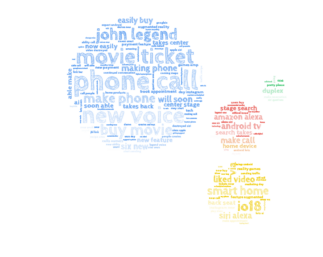

In [44]:
#make word cloud of tweets, "google" and "assistant" have been removed from the cloud
ttp.frqwords(ga, './data/ga.jpg', 'google assistant')

In [55]:
#LDA
model0, feature_names0 = ttp.LDA(ga['Tweet'].values, 3)
ttp.display_topics(model0, feature_names0, 15)

Topic 0:
siri alexa new amp day feature features marketing recipe reality games augmented payment instagram awesome
Topic 1:
new voice voices john legend maps coming volvo video future io18 use cars gets cnet
Topic 2:
phone tickets movie make calls buy android ai smart home making tv easily devices 2018


#### model0:
Topic 0: Comparison between new features of different apps.

Topic 1: New features in Google Assistant, like addition of John Legend voice and integration with Volvo's infotainment system.

Topic 2: Smart home device and how to buy a movie ticket with Google Assistant, which is a new feature.

In [56]:
model1, feature_names1 = ttp.LDA(ga['Tweet'].values, 5)
ttp.display_topics(model1, feature_names1, 15)

Topic 0:
alexa siri amp recipe instagram start amazon tech help people sending apple traffic sites getting
Topic 1:
phone make calls maps making 2018 io18 volvo able soon appointment future lg ai book
Topic 2:
tickets movie buy android smart home tv easily devices jbl takes search soundbar new users
Topic 3:
new voices voice john legend coming feature android features ai marketing day reality games augmented
Topic 4:
just video awesome day star wars liked hey siri ton easter eggs let destroyed oneplus


#### model1:
Topic 0: Comparison between new features of different apps.

Topic 1: New features in Google Assistant, integration with Volvo's infotainment system.

Topic 2: A new feature assisting purchase movie tickets in Google Assistant.

Topic 3: Addition of John Legend voice.

Topic 4: Intergration of Start Wars in Google Assistant.

In [57]:
#NMF
model2, feature_names2= ttp.NMF(ga['Tweet'].values, 3)
ttp.display_topics(model2, feature_names2, 15)

Topic 0:
tickets movie buy easily lets users behalf fandango order help mattgsouthern techcrunch purchase voice tech
Topic 1:
new voices john legend voice coming including features try gets android io18 added maps right
Topic 2:
calls make phone making owners able appointment soon appointments book ai actual behalf human io18


#### model2:
Topic 0: GA's new feature of launching Gandango and purchasing movie tickets.

Topic 1: Addition of John Legend voice.

Topic 2: The demo of GA make appointment with human-like speech.

In [52]:
model3, feature_names3= ttp.NMF(ga['Tweet'].values, 5)
ttp.display_topics(model3, feature_names3, 15)

Topic 0:
tickets movie buy easily lets users behalf fandango order help mattgsouthern techcrunch purchase voice tech
Topic 1:
new voices john legend voice coming including try gets features android io18 added maps right
Topic 2:
calls make phone making owners able appointment soon appointments book ai actual behalf human reservations
Topic 3:
siri alexa just video liked destroyed asked amazon apple commands questions 150 won inaudible controlled
Topic 4:
takes search center stage seat seo recipe markup console amp engine discovery improve updates notices


#### model3:
Topic 0: GA new feature of launching Fandango and purchasing movie tickets.

Topic 1: Addition of John Legend voice.

Topic 2: The demo of GA make appointment with human-like speech.

Topic 3: Comparison between new features of different apps.

Topic 4: Multiple events or updates about GAs.


Model 1 and model 2 make more sense. Based on these models, most twitters are instereted in addition of John Legend voice to Google Assistant, the demo of GA making appointments with human-like speech, purchasing movie tickets with GA.